<a href="https://colab.research.google.com/github/AurelienCD/Formation_OCR_Ing_Machine_Learning/blob/main/DLbasicOptimKaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kaggle *Spaceship Titanic*

https://www.kaggle.com/competitions/spaceship-titanic/data

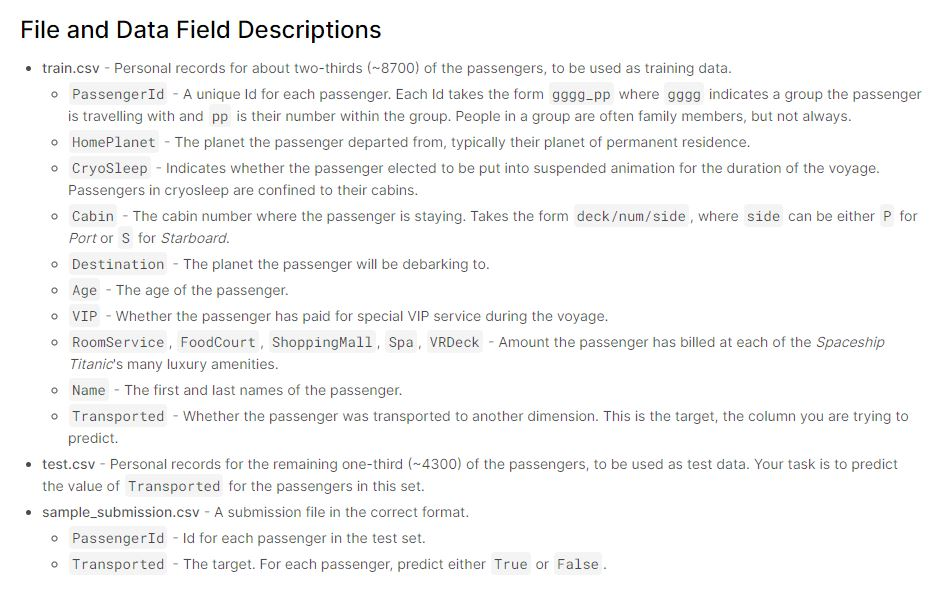

Connexion au google drive, déplacement dans le dossier contenant les données nécessaires au projet

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
%cd drive/MyDrive/Kaggle

/content/drive/MyDrive/Kaggle


Importation des librairies nécessaires au projet

In [19]:
import pandas as pad 
import numpy as np
from numpy.core.numeric import NaN

import datetime

import matplotlib.pyplot as plt
import seaborn as sns

import statistics
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind


import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as multi 

import pandas as pad 
import numpy as np
from numpy.core.numeric import NaN

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
#import functions
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score

from mpl_toolkits.mplot3d import Axes3D

from sklearn.metrics.cluster import adjusted_rand_score

from joblib import dump, load

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, GridSearchCV

from sklearn.preprocessing import *
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#from sklearn.neighbors import KNeighborsifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridgeifier

from sklearn.metrics import *
from sklearn.model_selection import KFold
from sklearn.metrics import  make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV

import tensorflow as tf
from tensorflow import keras
import random

ImportError: ignored

Importation des données

In [ ]:
df_train = pad.read_csv('train.csv')
df_test = pad.read_csv('test.csv')

### Préparation des données du fichier test

In [ ]:
df_test_mod = pad.read_csv('data_projet8_TEST_clean.csv')

In [ ]:
df_test_mod

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,Side,Deck,Cabin_number,Dépense_totale
0,0013_01,Earth,True,TRAPPIST-1e,27.0,False,S,G,3.0,0.0
1,0018_01,Earth,False,TRAPPIST-1e,19.0,False,S,F,4.0,2832.0
2,0019_01,Europa,True,55 Cancri e,31.0,False,S,C,0.0,0.0
3,0021_01,Europa,False,TRAPPIST-1e,38.0,False,S,C,1.0,7418.0
4,0023_01,Earth,False,TRAPPIST-1e,20.0,False,S,F,5.0,645.0
...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,TRAPPIST-1e,34.0,False,S,G,1496.0,0.0
4273,9269_01,Earth,False,TRAPPIST-1e,42.0,False,NaN,NaN,NaN,1018.0
4274,9271_01,Mars,True,55 Cancri e,NaN,False,P,D,296.0,0.0
4275,9273_01,Europa,False,NaN,NaN,False,P,D,297.0,3203.0


In [ ]:
df_test_mod = df_test_mod.dropna()

Préparation des données quantitatives (standardisation) et catégorielles (encodage)

In [ ]:
oneHotEncoder_fit = OneHotEncoder(sparse=False).fit(df_test_mod[features_Qual])
df_features_Qual = oneHotEncoder_fit.fit_transform(df_test_mod[features_Qual])

NameError: ignored

In [ ]:
oneHotEncoder_fit.get_feature_names().tolist()

NameError: ignored

In [ ]:
df_features_Quant = StandardScaler().fit_transform(df_test_mod[features_Quant])
df_features_Quant_norm = pad.DataFrame(columns = df_test_mod[features_Quant].columns, data = df_features_Quant).set_index(df_test_mod.index)

NameError: ignored

In [ ]:
df_test_norm = pad.merge(df_features_Quant_norm, pad.DataFrame(columns = oneHotEncoder_fit.get_feature_names().tolist(), data = oneHotEncoder_fit.fit_transform(df_test_mod[features_Qual])).set_index(df_test_mod.index), left_index = True, right_index = True)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#Chargement du modèle optimisé
model__KN = load('KNeighborsifier_model.joblib')

In [ ]:
df_test_mod["Prediction_Transported"] = model__KN.predict(df_test_norm)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_test_mod

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,Side,Deck,Cabin_number,Dépense_totale,Prediction_Transported
0,0013_01,Earth,True,TRAPPIST-1e,27.0,False,S,G,3.0,0.0,True
1,0018_01,Earth,False,TRAPPIST-1e,19.0,False,S,F,4.0,2832.0,False
2,0019_01,Europa,True,55 Cancri e,31.0,False,S,C,0.0,0.0,True
3,0021_01,Europa,False,TRAPPIST-1e,38.0,False,S,C,1.0,7418.0,True
4,0023_01,Earth,False,TRAPPIST-1e,20.0,False,S,F,5.0,645.0,False
...,...,...,...,...,...,...,...,...,...,...,...
4269,9263_01,Earth,True,TRAPPIST-1e,43.0,False,S,G,1495.0,0.0,True
4270,9265_01,Mars,False,TRAPPIST-1e,43.0,False,S,D,278.0,3898.0,False
4271,9266_01,Earth,False,TRAPPIST-1e,40.0,False,S,F,1796.0,868.0,False
4272,9266_02,Earth,True,TRAPPIST-1e,34.0,False,S,G,1496.0,0.0,True


In [ ]:
df_test_mod.set_index('PassengerId')

,HomePlanet,CryoSleep,Destination,Age,VIP,Side,Deck,Cabin_number,Dépense_totale,Prediction_Transported
PassengerId,,,,,,,,,,
0013_01,Earth,True,TRAPPIST-1e,27.0,False,S,G,3.0,0.0,True
0018_01,Earth,False,TRAPPIST-1e,19.0,False,S,F,4.0,2832.0,False
0019_01,Europa,True,55 Cancri e,31.0,False,S,C,0.0,0.0,True
0021_01,Europa,False,TRAPPIST-1e,38.0,False,S,C,1.0,7418.0,True
0023_01,Earth,False,TRAPPIST-1e,20.0,False,S,F,5.0,645.0,False
...,...,...,...,...,...,...,...,...,...,...
9263_01,Earth,True,TRAPPIST-1e,43.0,False,S,G,1495.0,0.0,True
9265_01,Mars,False,TRAPPIST-1e,43.0,False,S,D,278.0,3898.0,False
9266_01,Earth,False,TRAPPIST-1e,40.0,False,S,F,1796.0,868.0,False


In [ ]:
df_test_mod = df_test_mod.rename(columns={"Prediction_Transported": "Transported"})

In [ ]:
df_test_mod[['PassengerId' , 'Transported']].to_csv('Projet8_prediction.csv', index = False)

In [ ]:
df_test_mod[['PassengerId' , 'Transported']].head(20)

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
5,0027_01,False
7,0032_01,True
8,0032_02,True
9,0033_01,False
10,0037_01,False


#IA basique cycy:


In [40]:
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
import pandas as pad 
import numpy as np
from numpy.core.numeric import NaN
import tensorflow as tf
from tensorflow import keras
import random

from sklearn.model_selection import train_test_split

In [41]:
from google.colab import drive
drive.mount("/content/drive")
%cd drive/MyDrive/Kaggle

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[Errno 2] No such file or directory: 'drive/MyDrive/Kaggle'
/content/drive/MyDrive/Kaggle


In [57]:
#importation des données
df_X = pad.read_csv('data_projet8_TRAIN_mod.csv')
X=df_X.drop('Unnamed: 0',1)#enléve la premiére colone avec les numéros de ligne
df_y = pad.read_csv('data_projet8_TRAIN_clean.csv')
y=df_y["Transported"]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [62]:
#hot encoder
#tf.keras.preprocessing.text.one_hot (pour du text comme les noms)

def onehot(x):
  if x==0:
    vec=[0,1]
  else :
    vec=[1,0]
  return vec

y= pad.DataFrame(map(onehot, y))

In [ ]:
y

In [ ]:
#nomalisation
def minmax_norm(df):
    return (df - df.min()) / ( df.max() - df.min())

X = minmax_norm(X)
X

In [ ]:
# Split des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state = 7)
X_train


In [69]:
#####optimizer###################
ListOptimizerKeras=[
"SGD",
"RMSprop",
"Adam",
"Adadelta",
"Adagrad",
"Adamax",
"Nadam",
"Ftrl"]

##############loss attention entre  et function##########
ListLossProbalisticKeras=[
"BinaryCrossentropy", 
"CategoricalCrossentropy", 
"SparseCategoricalCrossentropy", 
#"binary_crossentropy",
#"categorical_crossentropy",
#"sparse_categorical_crossentropy",
"poisson", 
"kl_divergence" ]

ListLossRegressionKeras=[                       
"MeanSquaredError", 
"MeanAbsoluteError", 
"MeanAbsolutePercentageError",
"MeanSquaredLogarithmicError", 
"CosineSimilarity", 
"mean_squared_error", 
"mean_absolute_error", 
"mean_absolute_percentage_error", 
"mean_squared_logarithmic_error", 
"cosine_similarity", 
"Huber", 
"log_cosh"] 

ListLossHingeKeras=[
"Hinge", 
"SquaredHinge",
"CategoricalHinge", 
"hinge function",
"squared_hinge function",
"categorical_hinge function"]

##########################metric#################
ListAccuracyMetricsKeras=[
#"Accuracy", 
"BinaryAccuracy", 
"CategoricalAccuracy", 
"SparseCategoricalAccuracy", 
#"TopKCategoricalAccuracy", 
#"SparseTopKCategoricalAccuracy" 
]


ListProbabilisticMetricsKeras=[
"BinaryCrossentropy", 
"CategoricalCrossentropy", 
"SparseCategoricalCrossentropy", 
"KLDivergence", 
"Poisson"] 

ListRegressionMetricsKeras=[
"MeanSquaredError", 
"RootMeanSquaredError", 
"MeanAbsoluteError", 
"MeanAbsolutePercentageError", 
"MeanSquaredLogarithmicError", 
"CosineSimilarity", 
"LogCoshError"] 

ListclassificationMetricsKeras=[
"AUC", 
"Precision", 
"Recall", 
"TruePositives", 
"TrueNegatives", 
"FalsePositives", 
"FalseNegatives", 
"PrecisionAtRecall", 
"SensitivityAtSpecificity", 
"SpecificityAtSensitivity"] 

ListImageSegmentationMetricsKeras=[
"MeanIoU"] 

ListHingeMetricsKeras=[
"Hinge", 
"SquaredHinge", 
"CategoricalHinge"] 

############activation function#######################
ListActivationFunctionKeras=[
#"deserialize",# Returns activation function given a string identifier.
#"elu",# Exponential Linear Unit.
"exponential",# Exponential activation function.
#"gelu",# Applies the Gaussian error linear unit (GELU) activation function.
#"get",# Returns function.
#"hard_sigmoid",# Hard sigmoid activation function.
#"linear",# Linear activation function (pass-through).
#"relu",# Applies the rectified linear unit activation function.
#"selu",# Scaled Exponential Linear Unit (SELU).
#"serialize",# Returns the string identifier of an activation function.
"sigmoid",# Sigmoid activation function, sigmoid(x) = 1 / (1 + exp(-x)).
"softmax",# Softmax converts a vector of values to a probability distribution.
#"softplus",# Softplus activation function, softplus(x) = log(exp(x) + 1).
#"softsign",# Softsign activation function, softsign(x) = x / (abs(x) + 1).
#"swish",# Swish activation function, swish(x) = x * sigmoid(x).
"tanh"# Hyperbolic tangent activation function.
]

In [ ]:
#entrainement du model

model = keras.Sequential([#keras.layers.Dense(92, activation='relu'), 
                          #keras.layers.Dense(46, activation='relu'),
                          keras.layers.Dense(23, activation='relu'), 
                          keras.layers.Dense(2, activation='sigmoid')])


model.compile(optimizer='nadam',
              loss='BinaryCrossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=40)

In [ ]:
model.evaluate(X_test,y_test)

In [ ]:
#Optimisation du model grosso bourino:
OptimModelNom=[]
OptimModelValeur=[]
OptimModelValeurTest=[]
for optimizer_var in ListOptimizerKeras:
  for loss_var in ListLossProbalisticKeras:
    for metric_var in ListAccuracyMetricsKeras: 
      for activation_var in ListActivationFunctionKeras:
        print(optimizer_var+loss_var+metric_var+activation_var)
        model = keras.Sequential([#keras.layers.Dense(120, activation='relu'), 
                            #keras.layers.Dense(60, activation='relu'), 
                            keras.layers.Dense(24, activation='relu'), 
                            keras.layers.Dense(2, activation=activation_var)])
        try:
          model.compile(optimizer=optimizer_var, loss=loss_var, metrics=[metric_var])
          model.fit(X_train, y_train, epochs=10)
          performance=model.evaluate(X_train,y_train)
          performance_test=model.evaluate(X_test,y_test)
        except:
          performance=NaN
        OptimModelNom.append(optimizer_var+loss_var+metric_var+activation_var)
        OptimModelValeur.append(performance)
        OptimModelValeurTest.append(performance_test)

In [ ]:
adresse_resultat="/content/mergeTab.csv"
 #sauvegarde des données dans un csv 
tableau_donnee = pandas.merge(OptimModelNom,OptimModelValeur, left_index=True)
tableau_donnee = pandas.merge(tableau_donnee, OptimModelValeurTest,  left_index=True)
tableau_donnee.to_csv(adresse_resultat,header=True,sep=';')




In [ ]:
#performance du model

model.evaluate(X_test,y_test)


y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
